# 📊Project: Hotel Booking Demand || Data Cleaning & EDA

## Introduction

**The resort and city hotels are located in Portugal** and sell rooms through various market segments. In this project, i take on the role of a hospitality data analyst to explore a real-world dataset. The main objectives are to **clean the data**, **remove outliers**, and **identify key patterns** in order to clearly define the problems.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

## Table Of Contents (TOCs)

1. [Project](#)
    * [Introduction](#Introduction)
    * [Table Of Contents](#Table-Of-Contents-(TOCs))
    * [Data Description](#Data-Description)
2. [Data Preparation](#Data-Preparation)
3. [Data Cleaning](#Data-Cleaning)
    * [Data Quality Report](#Data-Quality-Report)
    * [Handling Null Values](#Handling-Null-Values)
    * [Converting Values](#Converting-Values)
        * [Mapping Dict: Booking Status](#A.-Mapping-Dict:-Booking-Status)
        * [Mapping Dict: Repeated Guest](#B.-Mapping-Dict:-Repeated-Guest)
        * [Mapping Dict: Meal Code](#C.-Mapping-Dict:-Meal-Code)
        * [Mapping Dict: Country Code](#D.-Mapping-Dict:-Country-Code)
        * [Creating Check-in column](#Creating-(Arrival)-check-in-column)
    * [Converting Types](#Converting-Types)
    * [Anomaly Detections](#Anomaly-Detections)
        * [Adults, Babies, Children can not be zero at the same time](#A.-Adults,-babies,-and-children-can-not-be-zero-at-the-same-time)
        * [Check Whether the check-in date is greater than the reservation date](#B.-Check-whether-the-check-in-date-is-greater-than-the-reservation_date)
        * [Unrealistic ADR with Confirmed Bookings](#C.-Unrealistic-ADR-with-Confirmed-Bookings)
    * [Dropping Columns](#Dropping-Columns)
    * [Renaming Columns](#Renaming-Columns)
    * [Reordering Columns](#Reordering-Columns)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * [Where are most of the guests coming from?](#Where-are-most-of-the-guests-coming-from?)
    * [Window Booking Behavior](#Window-Booking-Behavior)
    * [Cancellation](#Cancellation)
    * [ADR](#ADR)
5. [🧠Clearly Defined Need & The Detailed Questions](#🧠Clearly-Defined-Need-&-The-Detailed-Questions-for-the-skateholder.)
6. [Download the dataset](#Download-the-dataset)

## Data Description

- **hotel**: Hotel (H1 = Resort Hotel or H2 = City Hotel)
- **is_canceled**: Value indicating if the booking was canceled (1) or not (0)
- **lead_time**: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- **arrival_date_year**: Year of arrival date
- **arrival_date_month**: Month of arrival date
- **arrival_date_week_number**: Week number of year for arrival date
- **arrival_day_of_month**: Day of arrival date
- **stays_in_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- **stays_in_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- **adults**: Number of adults
- **children**: Number of children
- **babies**:  Number of babies
- **meal**: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal
- **country**: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- **market_segment**: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour
- **distribution_channel**: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- **is_repeated_guest**: Value indicating if the booking name was from a repeated guest (1) or not (0)
- **previous_cancellations**: Number of previous bookings that were cancelled by the customer prior to the current booking
- **previous_bookings_not_cancelled**: Number of previous bookings not cancelled by the customer prior to the current booking
- **reserved_room_type**: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- **assigned_room_type**: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved
- **booking_changes**: Number of changes/amendments made to the booking from the moment the booking was entered on
- **deposit_type**: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three
- **agent**: ID of the travel agency that made the booking
- **company**: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of
- **days_in_waiting_list**: Number of days the booking was in the waiting list before it was confirmed to the customer
- **customer_type**: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of
- **adr**: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- **required_car_parking**: Number of car parking spaces required by the customer
- **total_of_special_requests**: Number of special requests made by the customer (e.g. twin bed or high floor)
- **reservation_status**: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out
- **reservation_status_date**: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

## Data Preparation

- **Hotel Booking Dataset**: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data
- **Country Mapping Dataset**: https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region?utm_source=chatgpt.com

(The dataset from 10/2024 -> 09/2017)

In [2]:
country_df = pd.read_csv('country_mapping.csv', encoding = 'latin1')

In [3]:
hotel_bookings = pd.read_csv('hotel_bookings.csv', encoding = 'latin1')

In [4]:
display(hotel_bookings)

,Index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,2,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,3,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,4,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,5,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119386,City Hotel,0,23,2017,August,35,30,2,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,119387,City Hotel,0,102,2017,August,35,31,2,2,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,119388,City Hotel,0,34,2017,August,35,31,2,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,119389,City Hotel,0,109,2017,August,35,31,2,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [5]:
hotel_bookings = hotel_bookings.reset_index()

# Data Cleaning

## Data Quality Report

In [6]:
def check_data_quality(df):
    quality_report = {
        'null_values' : df.isnull().sum().to_dict(),
        'duplicate_values': df.duplicated().sum(),
        'info': df.info()
    }
    return quality_report

In [7]:
quality_report = check_data_quality(hotel_bookings)
display(quality_report)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   Index                           119390 non-null  int64  
 2   hotel                           119390 non-null  object 
 3   is_canceled                     119390 non-null  int64  
 4   lead_time                       119390 non-null  int64  
 5   arrival_date_year               119390 non-null  int64  
 6   arrival_date_month              119390 non-null  object 
 7   arrival_date_week_number        119390 non-null  int64  
 8   arrival_date_day_of_month       119390 non-null  int64  
 9   stays_in_weekend_nights         119390 non-null  int64  
 10  stays_in_week_nights            119390 non-null  int64  
 11  adults                          119390 non-null  int64  
 12  children        

{'null_values': {'index': 0,
  'Index': 0,
  'hotel': 0,
  'is_canceled': 0,
  'lead_time': 0,
  'arrival_date_year': 0,
  'arrival_date_month': 0,
  'arrival_date_week_number': 0,
  'arrival_date_day_of_month': 0,
  'stays_in_weekend_nights': 0,
  'stays_in_week_nights': 0,
  'adults': 0,
  'children': 4,
  'babies': 0,
  'meal': 0,
  'country': 488,
  'market_segment': 0,
  'distribution_channel': 0,
  'is_repeated_guest': 0,
  'previous_cancellations': 0,
  'previous_bookings_not_canceled': 0,
  'reserved_room_type': 0,
  'assigned_room_type': 0,
  'booking_changes': 0,
  'deposit_type': 0,
  'agent': 16340,
  'company': 112593,
  'days_in_waiting_list': 0,
  'customer_type': 0,
  'adr': 0,
  'required_car_parking_spaces': 0,
  'total_of_special_requests': 0,
  'reservation_status': 0,
  'reservation_status_date': 0},
 'duplicate_values': 0,
 'info': None}

In [8]:
# Percentage of Null Values
percentage_null_values = (hotel_bookings.isnull().sum() / len(hotel_bookings) * 100).sort_values(ascending=False)
percentage_null_values.loc[percentage_null_values > 0]

company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64

First of all, let's get a glimpse of dataset:
- The dataset is large including 119.390 rows with 32 columns. There are some missing values in several columns: `company`, `agent`, `country`, `children`.
    - `company` accounts the most percentage of null values with 112.593 out of 119.390 (94.30%)
    - `agent`, `country`, `children` column account **under 20.000 null values** respectively.

## Handling Null Values

Currently, we have 4 columns with Null Values, listed in descending order of percentage: `company`, `agent`, `country`, `children`.
- `company` column & `agent` & `children` columns do not need to bed filled with new value.
- `country` column: update null values to **Undefined**

In [9]:
hotel_bookings["country"] = np.where(hotel_bookings["country"].isnull(), "Undefined", hotel_bookings["country"])

## Converting Values

### A. Mapping Dict: Booking Status

In [10]:
booking_status = {
    0: "Confirmed",
    1: "Cancelled"
}
hotel_bookings["is_canceled"] = hotel_bookings["is_canceled"].map(booking_status)

### B. Mapping Dict: Repeated Guest

In [11]:
repeated_status = {
    0: "No",
    1: "Yes"
}
hotel_bookings["is_repeated_guest"] = hotel_bookings["is_repeated_guest"].map(repeated_status)

### C. Mapping Dict: Meal Code

- BB: Bed & Breakfast
- FB: Full Board (Beakfast, Lunch and Dinner)
- HB: Half Board (Breakfast and Dinner normally)
- SC: Self Catering

**reference**: https://www.arbat-house.com/en/articles/types-of-food-in-hotels/

In [12]:
meal_mapping = {
    "BB": "Bed & Breakfast",
    "FB": "Full Board",
    "HB": "Half Board",
    "SC": "Self Catering",
    "Undefined": "Undefined"
}
hotel_bookings["meal"] = hotel_bookings["meal"].map(meal_mapping)

### D. Mapping Dict: Country Code

In [13]:
country_df

,Country Name,Code,Region
0,Afghanistan,AFG,Asia
1,Åland Islands,ALA,Europe
2,Albania,ALB,Europe
3,Algeria,DZA,Africa
4,American Samoa,ASM,Oceania
...,...,...,...
244,Wallis and Futuna,WLF,Oceania
245,Western Sahara,ESH,Africa
246,Yemen,YEM,Asia
247,Zambia,ZMB,Africa


In [14]:
# Country
hotel_bookings = hotel_bookings.merge(
    country_df,
    left_on ="country",
    right_on = "Code",
    how = "left"
)

## Creating (Arrival) check-in column

In [15]:
hotel_bookings["month_number"] = pd.to_datetime(hotel_bookings["arrival_date_month"], format = '%B').dt.strftime("%m").astype(int)

In [16]:
hotel_bookings["check_in"] = pd.to_datetime(
    hotel_bookings["arrival_date_year"].astype(str) + " " +
    hotel_bookings["month_number"].astype(str) + " " +
    hotel_bookings["arrival_date_day_of_month"].astype(str),
    format="%Y %m %d")

In [17]:
hotel_bookings.loc[:,["check_in","is_canceled","reservation_status_date","reservation_status"]]

,check_in,is_canceled,reservation_status_date,reservation_status
0,2015-07-01,Confirmed,7/1/2015,Check-Out
1,2015-07-01,Confirmed,7/1/2015,Check-Out
2,2015-07-01,Confirmed,7/2/2015,Check-Out
3,2015-07-01,Confirmed,7/2/2015,Check-Out
4,2015-07-01,Confirmed,7/3/2015,Check-Out
...,...,...,...,...
119385,2017-08-30,Confirmed,9/6/2017,Check-Out
119386,2017-08-31,Confirmed,9/7/2017,Check-Out
119387,2017-08-31,Confirmed,9/7/2017,Check-Out
119388,2017-08-31,Confirmed,9/7/2017,Check-Out


## Converting Types

In [18]:
def convert_types(dataset,col_name,dtypes):
    dataset[col_name] = dataset[col_name].astype(dtypes)

In [19]:
convert_types(hotel_bookings,"children","Int64")
convert_types(hotel_bookings,"agent","Int64")
convert_types(hotel_bookings,"company","Int64")

In [20]:
hotel_bookings["check_in"] = pd.to_datetime(
    hotel_bookings["arrival_date_year"].astype(str) + " " +
    hotel_bookings["month_number"].astype(str) + " " +
    hotel_bookings["arrival_date_day_of_month"].astype(str),
    format="%Y %m %d")

In [21]:
hotel_bookings["reservation_status_date"] = pd.to_datetime(hotel_bookings["reservation_status_date"], format = "%m/%d/%Y")

## Anomaly Detections

### A. Adults, babies, and children can not be zero at the same time

A booking must have aleast one guest. Therefore, if `Adults`, `Babies`, `Children` = 0 at the same time, it means there is no customer staying -> **The data is illogical**

In [22]:
hotel_bookings.loc[(hotel_bookings["adults"]==0) & (hotel_bookings["children"]==0) & (hotel_bookings["babies"] ==0),
                   ["index","hotel","check_in","is_canceled","reservation_status_date",
                    "reservation_status","adults","children","babies"]]

,index,hotel,check_in,is_canceled,reservation_status_date,reservation_status,adults,children,babies
2224,2224,Resort Hotel,2015-10-06,Confirmed,2015-10-06,Check-Out,0,0,0
2409,2409,Resort Hotel,2015-10-12,Confirmed,2015-10-12,Check-Out,0,0,0
3181,3181,Resort Hotel,2015-11-20,Confirmed,2015-11-23,Check-Out,0,0,0
3684,3684,Resort Hotel,2015-12-30,Confirmed,2016-01-04,Check-Out,0,0,0
3708,3708,Resort Hotel,2015-12-30,Confirmed,2016-01-05,Check-Out,0,0,0
...,...,...,...,...,...,...,...,...,...
115029,115029,City Hotel,2017-06-27,Confirmed,2017-06-30,Check-Out,0,0,0
115091,115091,City Hotel,2017-06-30,Confirmed,2017-07-01,Check-Out,0,0,0
116251,116251,City Hotel,2017-07-15,Confirmed,2017-07-17,Check-Out,0,0,0
116534,116534,City Hotel,2017-07-15,Confirmed,2017-07-22,Check-Out,0,0,0


In [23]:
hotel_bookings = hotel_bookings.loc [  #Lấy những giá trị khác với điều kiện
    ~((hotel_bookings["adults"] == 0) & (hotel_bookings["children"] ==0) & (hotel_bookings["babies"] ==0))]

There are **180 rows** that meet these conditions, so I am going to **delete them**.

### B. Check whether the check-in date is greater than the reservation_date

In [24]:
x = hotel_bookings.loc[(hotel_bookings["check_in"] > hotel_bookings["reservation_status_date"]) &
                       (hotel_bookings["is_canceled"] == "Confirmed"),
                   ["index","hotel","check_in","is_canceled", "reservation_status_date","reservation_status"]]
display(x)

,index,hotel,check_in,is_canceled,reservation_status_date,reservation_status


- The data has been **updated correctly** in the system:
    - If `check_in` < `reservation_status_date` -> The customer went to the hotel and stayed.
    - If `check_in` > `reservation_status_date` -> The customer cancelled before the `check-in` date, and `reservation_status_date` && `status` were updated.

### C. Unrealistic ADR with Confirmed Bookings

- ADR (Average Daily Rate) is calculated from the revenue over the customers' stay duration (ranging from **-6.38** to **5.400**) for both **confirmed** and **cancelled** bookings. However, we will focus on analyzing `ADR` from **confirmed** bookings with values <=0, since there are **1.623** rows where ADR <=0.

In [25]:
alerts_adr = hotel_bookings.loc[(hotel_bookings["adr"] <= 0) &
                  (hotel_bookings["is_canceled"] == "Confirmed"),
                ["index","hotel","check_in", "is_canceled","reservation_status_date", "reservation_status","market_segment",
                 "reserved_room_type", "assigned_room_type","customer_type", "adr"]]

In [26]:
alerts_adr["adr"].value_counts(dropna=False).head(60)

adr
 0.00    1622
-6.38       1
Name: count, dtype: int64

In [27]:
alerts_adr["stay_duration"] = (alerts_adr["reservation_status_date"] - alerts_adr["check_in"]).dt.days

In [28]:
display(alerts_adr)

,index,hotel,check_in,is_canceled,reservation_status_date,reservation_status,market_segment,reserved_room_type,assigned_room_type,customer_type,adr,stay_duration
0,0,Resort Hotel,2015-07-01,Confirmed,2015-07-01,Check-Out,Direct,C,C,Transient,0.0,0
1,1,Resort Hotel,2015-07-01,Confirmed,2015-07-01,Check-Out,Direct,C,C,Transient,0.0,0
125,125,Resort Hotel,2015-07-04,Confirmed,2015-07-05,Check-Out,Complementary,H,H,Transient,0.0,1
167,167,Resort Hotel,2015-07-06,Confirmed,2015-07-06,Check-Out,Online TA,A,H,Transient,0.0,0
168,168,Resort Hotel,2015-07-06,Confirmed,2015-07-06,Check-Out,Direct,E,H,Transient,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
118631,118631,City Hotel,2017-08-23,Confirmed,2017-08-23,Check-Out,Offline TA/TO,A,K,Transient-Party,0.0,0
118762,118762,City Hotel,2017-08-24,Confirmed,2017-08-25,Check-Out,Complementary,A,D,Transient,0.0,1
118963,118963,City Hotel,2017-08-27,Confirmed,2017-08-27,Check-Out,Direct,A,A,Transient,0.0,0
119102,119102,City Hotel,2017-08-26,Confirmed,2017-08-29,Check-Out,Groups,A,A,Transient-Party,0.0,3


In [29]:
alerts_adr["stay_duration"].value_counts()

stay_duration
0     624
1     454
2     317
3     113
4      44
5      16
6      13
7      13
9       8
8       7
14      3
10      2
12      2
11      1
48      1
29      1
30      1
15      1
46      1
13      1
Name: count, dtype: int64

In [30]:
alerts_adr["assigned_room_type"].value_counts()

assigned_room_type
A    686
D    289
I    196
E    101
F     91
G     89
K     64
B     56
C     39
H     12
Name: count, dtype: int64

In [31]:
alerts_adr["customer_type"].value_counts()

customer_type
Transient          1203
Transient-Party     386
Contract             19
Group                15
Name: count, dtype: int64

In [32]:
alerts_adr["market_segment"].value_counts()

market_segment
Complementary    581
Online TA        303
Offline TA/TO    266
Groups           213
Direct           190
Corporate         67
Aviation           3
Name: count, dtype: int64

- We have ADR <=0 with a booking status of **confirmed**:
    - ADR extends from **0 -> 48 days**.
    - A specific Room Type, Day 0 and Transient customers account for most of these cases.
    - The `Complementary` market segment has **581 rows** -> this segment is given free of charge to guests.

=> Therefore, rows with ADR <=0 affect revenue and frequency analysis. I am going to remove these rows except those beloging to the `Complementary` market segment.

In [33]:
hotel_bookings = hotel_bookings.loc[~( #Update rows "~"" not meeting these conditions.
    (hotel_bookings["adr"] <= 0) &
    (hotel_bookings["is_canceled"] == "Confirmed") &
    (hotel_bookings["market_segment"] != "Complementary")    
)]

## Dropping Columns

In [34]:
# The axis number (0 for rows and 1 for columns.)
def drop_cols (df, col):
    df = df.drop(col,axis=1,inplace=True)

In [35]:
drop_cols(hotel_bookings, "Index")
drop_cols(hotel_bookings, "arrival_date_year")
drop_cols(hotel_bookings, "arrival_date_month")
drop_cols(hotel_bookings, "arrival_date_week_number")
drop_cols(hotel_bookings, "arrival_date_day_of_month")
drop_cols(hotel_bookings, "month_number")
drop_cols(hotel_bookings, "Code")

## Renaming Columns

In [36]:
hotel_bookings.rename({
    "index" : "index",
    "hotel" : "hotel_type",
    "is_canceled" : "booking_status",
    "lead_time" : "window_booking",
    "check_in" : "check_in",
    "stays_in_week_nights" : "week_nights",
    "stays_in_weekend_nights": "weekend_nights",
    "adults": "number_adults",
    "children": "number_children",
    "babies": "number_babies",
    "meal" : "meal_code",
    "country" : "country_code",
    "market_segment" : "market_segment",
    "distribution_channel" : "distribution_channel",
    "is_repeated_guest" : "repeated_guest",
    "previous_cancellations": "prev_cancels",
    "previous_bookings_not_canceled" : "prev_not_cancels",
    "reserved_room_type": "reserved_room",
    "assigned_room_type": "assigned_room",   
    "booking_changes" : "booking_changes",
    "deposit_type" : "deposit_type",  
    "agent" : "agent_id",
    "company" : "company_id",
    "days_in_waiting_list" : "days_in_waiting_list",
    "customer_type" : "customer_type",
    "adr":"adr",
    "required_car_parking_spaces" : "parking_spaces",  
    "total_of_special_requests" : "special_requests",
    "reservation_status" : "reservation_status",
    "reservation_status_date" : "reservation_date"  ,
    "Country Name": "country_name",
    "Region": "region"
},axis = 1, inplace=True)

## Reordering Columns

In [37]:
hotel_cols_order = [
    "index",
# Booking Information Table
    "hotel_type", "window_booking", "check_in", "booking_status", "booking_changes", "reservation_date", "reservation_status",
    "deposit_type", "agent_id", "company_id",
# Date Information Table
    "weekend_nights", "week_nights", "days_in_waiting_list",
# Detailed Customer Information Table
    "number_adults", "number_children", "number_babies", "country_code", "country_name","region",
    "market_segment", "distribution_channel", "repeated_guest", "customer_type",
# Service and Room Information Table
    "reserved_room", "assigned_room", "meal_code",
    "parking_spaces", "special_requests",
# Booking History Table
    "prev_cancels", "prev_not_cancels",
# Revenue Table
    "adr"
]
hotel_bookings = hotel_bookings[hotel_cols_order]

# Exploratory Data Analysis

## Where are most of the guests coming from?

In [38]:
customer_country = hotel_bookings.loc[hotel_bookings['booking_status'] == 'Confirmed',['country_name', 'region']]

In [39]:
display(customer_country)

,country_name,region
2,United Kingdom,Europe
3,United Kingdom,Europe
4,United Kingdom,Europe
5,United Kingdom,Europe
6,Portugal,Europe
...,...,...
119385,Belgium,Europe
119386,France,Europe
119387,Germany,Europe
119388,United Kingdom,Europe


In [40]:
customer_country['region'].value_counts()

region
Europe      66071
Americas     3476
Asia         1967
Africa        626
Oceania       392
Name: count, dtype: int64

In [41]:
customer_country['country_name'].value_counts().sort_values(ascending=False).head(10)

country_name
Portugal          20221
United Kingdom     9619
France             8429
Spain              6322
Germany            6031
Ireland            2538
Italy              2417
Belgium            1862
Netherlands        1712
United States      1585
Name: count, dtype: int64

Mostly, the customers travel within the country or around countries in Europe.

## Window Booking Behavior

Firstly, we see that the **timeframe between when a customer makes a reservation and their arrival ranges** from 0 to **737 days**. Since there are so many days, so i am going to group the timeframe into 5 categories: `0-7 days`, `8-30 days`, `31-90 days`, `91-180 days`, `180+ days`

In [42]:
print(sorted(hotel_bookings["window_booking"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

**Explain the code:** 
- When creating the `bucket`, **day 0 was recorded as NaN**. Therefore, i added `include_lowest=True`, which means it will take day 0 as the beginning instead of starting from day.

In [43]:
hotel_bookings["bucket"] = pd.cut(hotel_bookings["window_booking"],bins=[0,7,30,90,180,np.inf], labels =["0-7 days","8-30 days", "31-90 days","91-180 days", "180+ days"],include_lowest=True)
hotel_bookings.loc[:,['hotel_type','booking_status','window_booking', 'market_segment', 'distribution_channel','bucket']]

,hotel_type,booking_status,window_booking,market_segment,distribution_channel,bucket
2,Resort Hotel,Confirmed,7,Direct,Direct,0-7 days
3,Resort Hotel,Confirmed,13,Corporate,Corporate,8-30 days
4,Resort Hotel,Confirmed,14,Online TA,TA/TO,8-30 days
5,Resort Hotel,Confirmed,14,Online TA,TA/TO,8-30 days
6,Resort Hotel,Confirmed,0,Direct,Direct,0-7 days
...,...,...,...,...,...,...
119385,City Hotel,Confirmed,23,Offline TA/TO,TA/TO,8-30 days
119386,City Hotel,Confirmed,102,Online TA,TA/TO,91-180 days
119387,City Hotel,Confirmed,34,Online TA,TA/TO,31-90 days
119388,City Hotel,Confirmed,109,Online TA,TA/TO,91-180 days


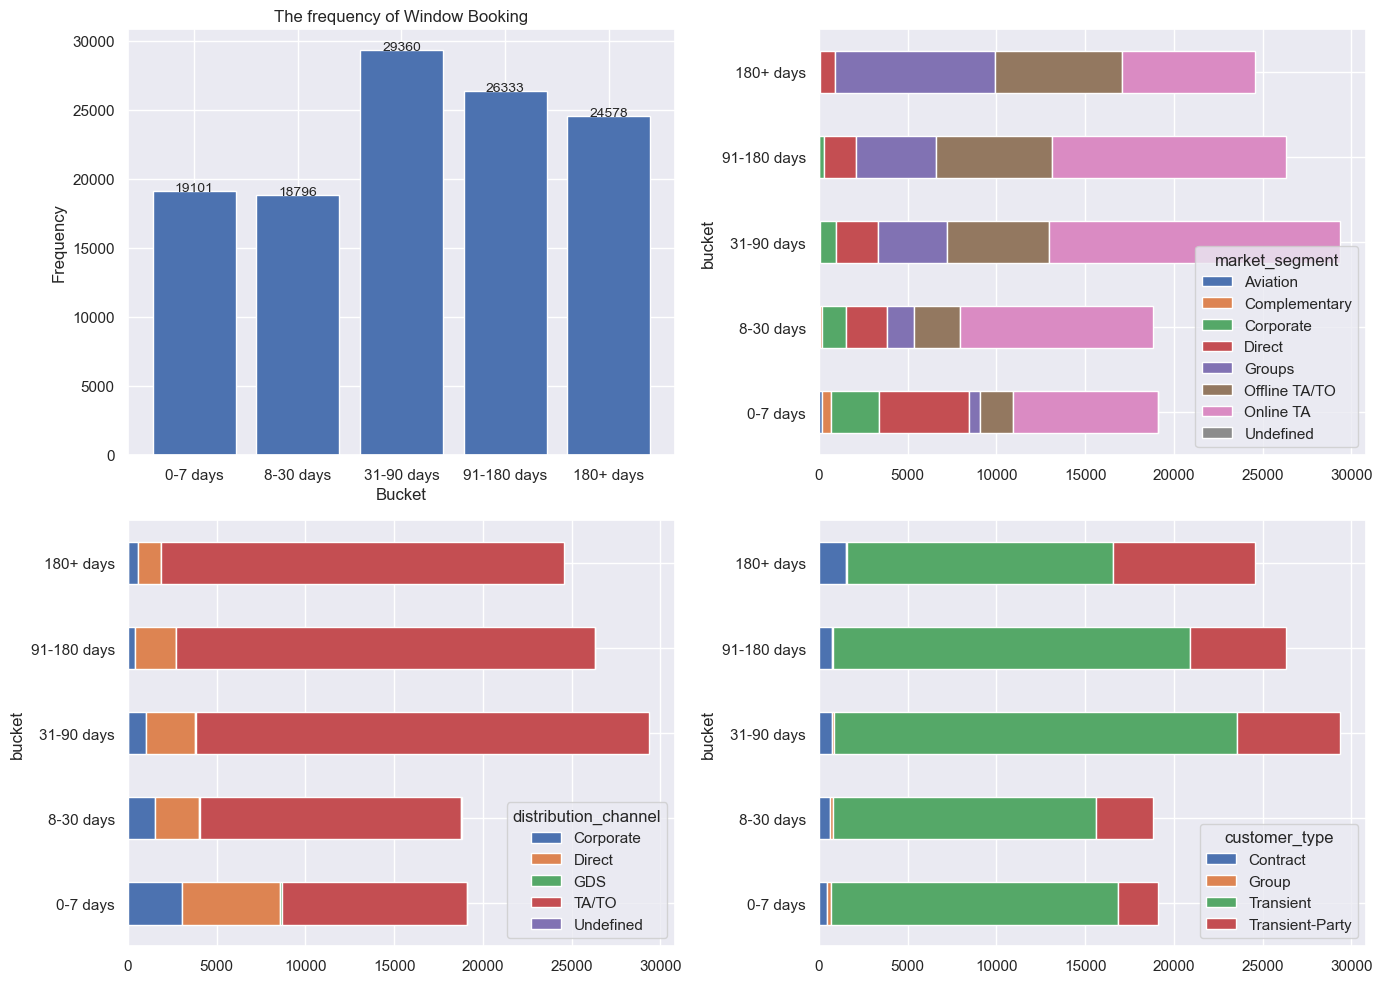

In [44]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))

#1. The frequency of Window Booking by bucket
frq_window_booking_bucket = hotel_bookings.groupby('bucket')['window_booking'].size()
axes[0,0].bar(frq_window_booking_bucket.index, 
              frq_window_booking_bucket.values, 
              label = 'Bookings')

axes[0,0].set_title('The frequency of Window Booking')
axes[0,0].set_xlabel('Bucket')
axes[0,0].set_ylabel('Frequency')


## Display Data
for i, v in enumerate(frq_window_booking_bucket.values):
    axes[0,0].text(i , v + 2, f"{v:}", ha='center', fontsize=10)

#-------------------------------------------------------------------------------------------------------------------------------

#2. The frequency of Window Booking by Market Segment
hotel_bookings.groupby(['bucket','market_segment']).size().unstack().plot(kind='barh', stacked=True, ax = axes[0,1])

#3. The frequency of Window Booking by Distribution Channel
hotel_bookings.groupby(['bucket','distribution_channel']).size().unstack().plot(kind='barh', stacked=True, ax = axes[1,0])


#4. The frequency of Window Booking by Customer Type
hotel_bookings.groupby(['bucket','customer_type']).size().unstack().plot(kind='barh', stacked=True, ax = axes[1,1])

    
plt.tight_layout()
plt.savefig('Window Booking Behavior by Bucket with various segments.png')
plt.show()

### Overview:
> - All `5 window booking buckets` have a high number of bookings (> 15,000 per bucket). Among them, customers tend to book from **30 days onward** (**~8% higher compared to the group under 30 days**).
> - The `31-90 days` is the most prefered, showing that **customers often plain their stay about 1 -> 3 months before check-in**.

### Market Segment:
> - The hotel has a diverse market segment, with **OTA accounting for the majority of bookings** across all buckets, especially in `31-90 days`.
> - `Groups` market usually books early (+180 days) -> these are typically company or group travellers.
> - `Corporate`, `Aviation`, `Complementary` achieve very few bookings and are insignificant.

### Distribution Channel:
> - `TA/TO` achieves the most across all buckets, especially from `31-180 days` -> This is an **important distribution channel** for the hotel.
> - `Dirrect` bookings are focused mostly on `0-7 days` bucket -> Indicating that some customers tends to book last-minute directly.
> - `Corporate/GDS` have an insignificant number of bookings

### Customer Type
> - The hotel mainly serves `Transient` and `Transient-Party` customers.
> - These two key customer types are **distributed quite evenly across the buckets**.

**Summary of Insights💡**: Customers tend to book 30-90 days in advance, with OTA and TA/TO being the two important channels that generate the most bookings. Additionally, the hotel's main customer segment is `Transient` (individuals or small groups).

## Cancellation

In [45]:
cancellation = hotel_bookings.loc[hotel_bookings["booking_status"] == 'Cancelled',:]
display(cancellation)

,index,hotel_type,window_booking,check_in,booking_status,booking_changes,reservation_date,reservation_status,deposit_type,agent_id,...,customer_type,reserved_room,assigned_room,meal_code,parking_spaces,special_requests,prev_cancels,prev_not_cancels,adr,bucket
8,8,Resort Hotel,85,2015-07-01,Cancelled,0,2015-05-06,Canceled,No Deposit,240,...,Transient,A,A,Bed & Breakfast,0,1,0,0,82.0,31-90 days
9,9,Resort Hotel,75,2015-07-01,Cancelled,0,2015-04-22,Canceled,No Deposit,15,...,Transient,D,D,Half Board,0,0,0,0,105.5,31-90 days
10,10,Resort Hotel,23,2015-07-01,Cancelled,0,2015-06-23,Canceled,No Deposit,240,...,Transient,E,E,Bed & Breakfast,0,0,0,0,123.0,8-30 days
27,27,Resort Hotel,60,2015-07-01,Cancelled,0,2015-05-11,Canceled,No Deposit,240,...,Transient,E,E,Bed & Breakfast,0,2,0,0,107.0,31-90 days
32,32,Resort Hotel,96,2015-07-01,Cancelled,0,2015-05-29,Canceled,No Deposit,<NA>,...,Transient,E,E,Bed & Breakfast,0,2,0,0,108.3,91-180 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108829,108829,City Hotel,25,2017-05-06,Cancelled,0,2017-05-06,No-Show,No Deposit,<NA>,...,Transient,E,F,Bed & Breakfast,0,0,0,1,125.0,8-30 days
111355,111355,City Hotel,4,2017-06-05,Cancelled,0,2017-06-05,Canceled,No Deposit,<NA>,...,Transient,A,A,Bed & Breakfast,0,0,0,4,65.0,0-7 days
111924,111924,City Hotel,7,2017-05-31,Cancelled,0,2017-05-31,Canceled,No Deposit,<NA>,...,Transient,A,A,Bed & Breakfast,0,0,0,1,65.0,0-7 days
111925,111925,City Hotel,6,2017-07-17,Cancelled,0,2017-07-17,No-Show,No Deposit,<NA>,...,Transient,A,D,Bed & Breakfast,0,0,1,1,65.0,0-7 days


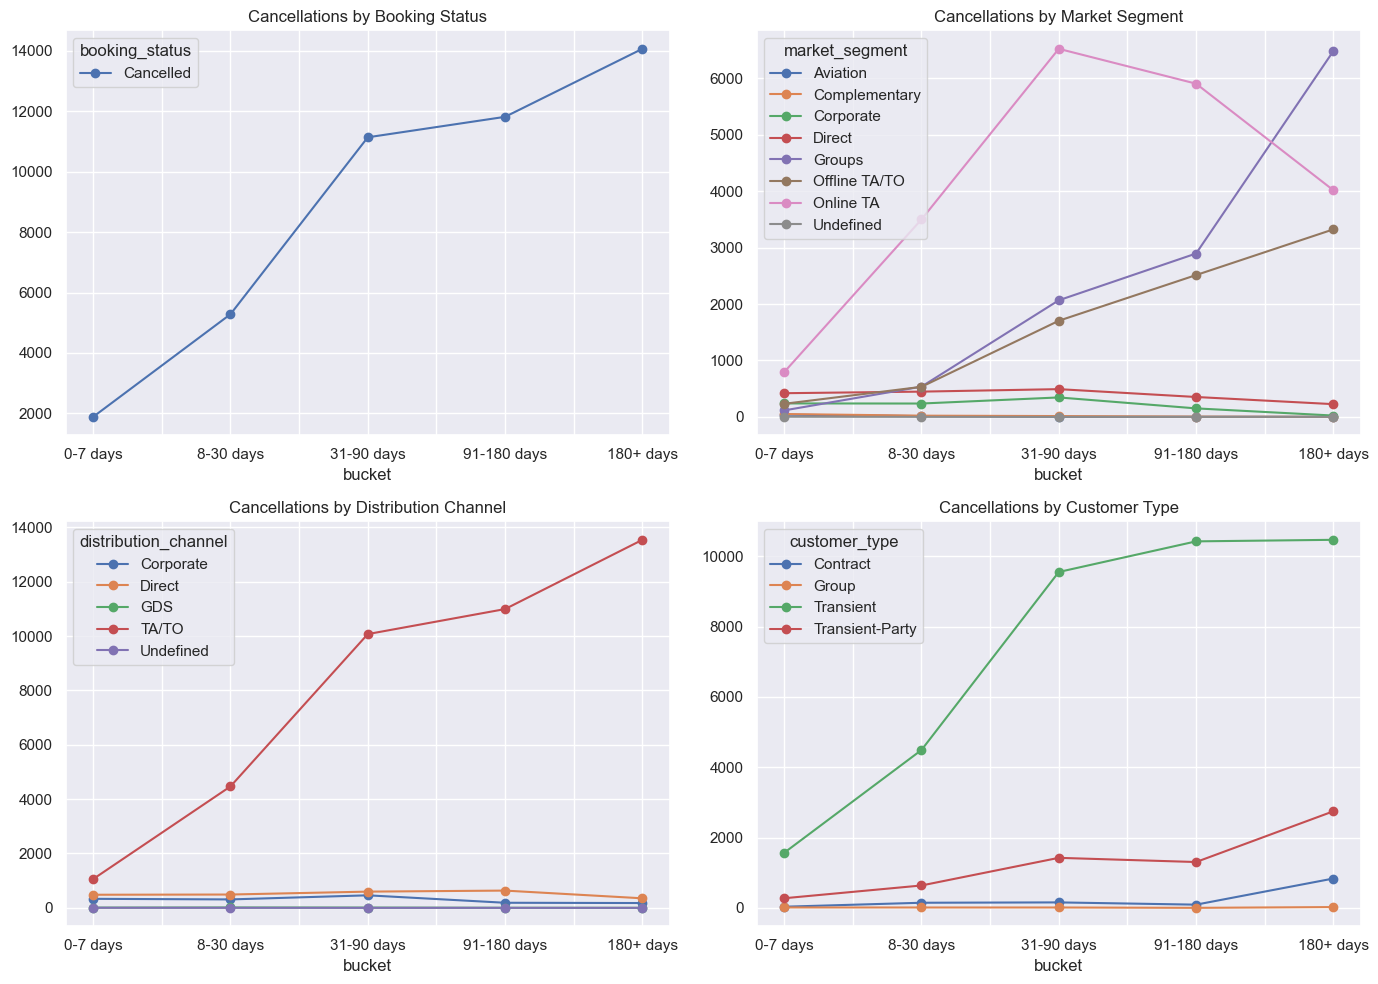

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

# Đặt thứ tự bucket đúng
bucket_order = ["0-7 days", "8-30 days", "31-90 days", "91-180 days", "180+ days"]
# Ép thành categorical
cancellation['bucket'] = pd.Categorical(cancellation['bucket'],
                                        categories=bucket_order,
                                        ordered=True)

# The number of cancellations by "Window Booking" bucket
cancellation.groupby(['bucket', 'booking_status']).size().unstack(fill_value=0).plot(kind='line', marker='o', ax=axes[0,0])
axes[0,0].set_title("Cancellations by Booking Status")

# The number of cancellations by Market Segment
cancellation.groupby(['bucket','market_segment']).size().unstack(fill_value=0).plot(kind='line', marker='o', ax=axes[0,1])
axes[0,1].set_title("Cancellations by Market Segment")

# The number of cancellations by Channel
cancellation.groupby(['bucket','distribution_channel']).size().unstack(fill_value=0).plot(kind='line', marker='o', ax=axes[1,0])
axes[1,0].set_title("Cancellations by Distribution Channel")

# The number of cancellations by Customer Type
cancellation.groupby(['bucket','customer_type']).size().unstack(fill_value=0).plot(kind='line', marker='o', ax=axes[1,1])
axes[1,1].set_title("Cancellations by Customer Type")

plt.tight_layout()
plt.savefig('Cancellations by Bucket with various segments.png')
plt.show()

### Overview:
> - The longer the `Window Booking`, the higher the cancellations. Group with window booking less than 30 days before check-in **have a much lower cancellation rate** compared to those above 30 days -> Last-minute bookings bring more stability and efficiency than early-bird booking.

### Market Segment:
> - `OTA (Online TA)`, although having the highest number of bookings compared to other markets, also ranks first in cancellations acroos `window booking buckets`.
> - `Aviation`, `Corporate`, `Direct` segments have few cancellations.
> - `Groups` focus on  a collective of guests but also show a hight cancellation ( this is understandable since `Groups` bookings are often tied to company event or plans that can easily be disrupted)

### Distribution Channel:
> - TA/TO is the main distribution channel, but also the one with the highest cancellations across all buckets.
> - Other channels like `Direct`, `GDS`, `Corporate` contribute little bookings and have no significant impact.

### Customer Type:
> - Transient customers have the highest number of bookings, but also the highest number of cancellations.
> - Transient-party customers show a medium but still considerable level of cancellations.

**Summary of 💡**: The 3 buckets above 30 days (30-90, 180, 180+) generate the highest bookings and highest cancellations, If cancellations in these groups are not solved, the hotel will lose a significant potential revenue. Therefore, the hotel needs to focus on **reducing long-window cancellations**, especially throught `TA/OT` and `OTA channels`.

## ADR

In [47]:
# cancellation_rate = (number of cancellations / total bookings) *100

# 1. Cancellation Rate by Bucket
total_booking_bucket = hotel_bookings.groupby(['bucket']).size()
cancelled_booking_bucket = hotel_bookings.loc[hotel_bookings['booking_status'] == 'Cancelled'].groupby(['bucket']).size()
cancelled_rate_bucket = (cancelled_booking_bucket / total_booking_bucket * 100)

# 2. Cancellation Rate by Market
total_booking_market = hotel_bookings.groupby(['market_segment']).size()
cancelled_booking_market = hotel_bookings.loc[hotel_bookings['booking_status'] == 'Cancelled'].groupby(['market_segment']).size()
cancelled_rate_market = (cancelled_booking_market / total_booking_market * 100)

# 3. Cancellation Rate by Channel
total_booking_channel = hotel_bookings.groupby(['distribution_channel']).size()
cancelled_booking_channel = hotel_bookings.loc[hotel_bookings['booking_status'] == 'Cancelled'].groupby(['distribution_channel']).size()
cancelled_rate_channel = (cancelled_booking_channel / total_booking_channel * 100)

# 4. Cancellation Rate by Customer Type
total_booking_customer_type = hotel_bookings.groupby(['customer_type']).size()
cancelled_booking_customer_type = hotel_bookings.loc[hotel_bookings['booking_status'] == 'Cancelled'].groupby(['customer_type']).size()
cancelled_rate_customer_type = (cancelled_booking_customer_type / total_booking_customer_type * 100)

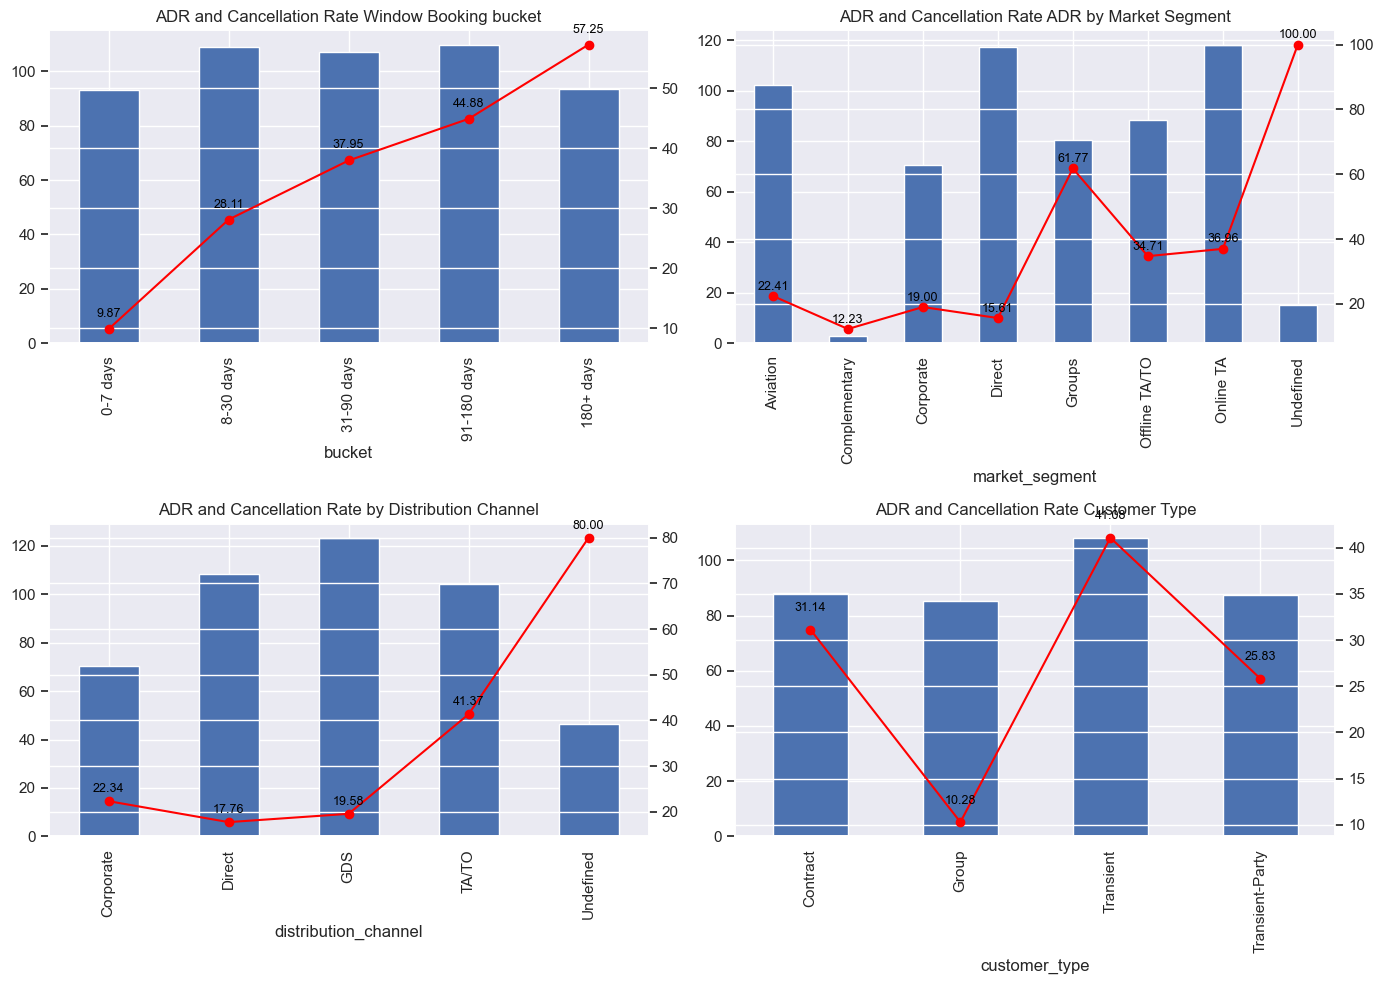

In [48]:
fig, axes = plt.subplots(nrows =2, ncols =2, figsize= (14,10))

hotel_bookings.groupby('bucket')['adr'].mean().plot(kind='bar', stacked = True, ax = axes [0,0])
axes[0,0].set_title('ADR and Cancellation Rate Window Booking bucket')

ax2 = axes[0,0].twinx()
ax2.plot(cancelled_rate_bucket.index,
        cancelled_rate_bucket.values,
        color = 'red', marker = 'o', label = 'Cancellations')

for i, v in enumerate(cancelled_rate_bucket.values):
    ax2.text(i, v + 2, f"{v:.2f}", ha='center', fontsize=9, color="black")
#----------------------------------------------------------------------------------------------------------
hotel_bookings.groupby(['market_segment'])['adr'].mean().plot(kind='bar', stacked = True, ax = axes [0,1])
axes[0,1].set_title('ADR and Cancellation Rate ADR by Market Segment')

ax2 = axes[0,1].twinx()
ax2.plot(cancelled_rate_market.index,
        cancelled_rate_market.values,
        color = 'red', marker = 'o', label = 'Cancellations')

for i, v in enumerate(cancelled_rate_market.values):
    ax2.text(i, v + 2, f"{v:.2f}", ha='center', fontsize=9, color="black")
#----------------------------------------------------------------------------------------------------------
hotel_bookings.groupby('distribution_channel')['adr'].mean().plot(kind='bar', stacked = True, ax = axes [1,0])
axes[1,0].set_title('ADR and Cancellation Rate by Distribution Channel')

ax2 = axes[1,0].twinx()
ax2.plot(cancelled_rate_channel.index,
        cancelled_rate_channel.values,
        color = 'red', marker = 'o', label = 'Cancellations')
for i, v in enumerate(cancelled_rate_channel.values):
    ax2.text(i, v + 2, f"{v:.2f}", ha='center', fontsize=9, color="black")
#----------------------------------------------------------------------------------------------------------
hotel_bookings.groupby('customer_type')['adr'].mean().plot(kind='bar', stacked = True, ax = axes [1,1])
axes[1,1].set_title('ADR and Cancellation Rate Customer Type')

ax2 = axes[1,1].twinx()
ax2.plot(cancelled_rate_customer_type.index,
        cancelled_rate_customer_type.values,
        color = 'red', marker = 'o', label = 'Cancellations')

for i, v in enumerate(cancelled_rate_customer_type.values):
    ax2.text(i, v + 2, f"{v:.2f}", ha='center', fontsize=9, color="black")

plt.tight_layout()
plt.savefig('ADR by Bucket with various segments.png')
plt.show()

### Overview:
> - The ADR across `Window Booking Buckets` ranges from 90 -> 100.
> - The `cancellation rate` increases sharply with longer booking window: from **9.87%** (`0-7 days`) up to **57.25%** (`180+days`).

=> This shows that **ADR is not a factor affecting to cancellations**.

### Market:
> - `Undefined`: 100% cancellation rate, but only two rows.
> - `Complementary`: ADR nearly 0 (since these are complementary rooms), therfore cancellation rate is low.
> - `Direct` and `Online TA` markets both have high ADR, but `Direct` shows a much lower cancellation rate **15%**

=> `OTA` and `Groups` are **two high-risk market segments** causing the large revenue loss.


### Distribution Channel: 
> - `Direct` & `GDS` have high ADR (**+100**), but low cancellation rates (**17-20%**) -> Effective channels with less revenue loss.
> - `TA/TO` with high cancellation rate (**41.37%**) -> This is the **strategic distribution channel** of hotel and alse causing most cancellations.

### Customer Type:
> - `Transient` has highest ADR and cancellation rate (**~42%**) -> Individual travelers are the main source of cancellations

**Insights 💡**: 
- The majorty of bookings come from `Early-Booking`. `Groups`, `Online TA`, and `TA/TO` face both a large of bookings and a high of cancellations. Additionally, `Transient` customers contribute significantlyto the cancellation rate.
- ADR is not the key factor affecting cancellations. Instead, cancellations are connected to window booking, therefore a hotel needs to **implement stricter policies** for bookings made more than 30 days in advance. Since cancellations are inevitable - especially `no deposit && free cancellation policies`.

# 🧠Clearly Defined Need & The Detailed Questions for the skateholder.

### Pain Points:
> - Customers usually book 30-90 days before check-in, with the most important channels (`OTA`), which bring in the highest number of bookings. In addition, the `Trasient` customer segment (typically individual travellers || small groups) contribute the most bookings.
> - Among the window booking buckets, those made 30+ days in advance (30-90, 91-180, +180) not only generate high booking volumes, but also account for highest cancellation rate compared to `window booking bucket` < 30 days. Most cancellations come from the `Early-Booking` group. The hotel face 3 mains risk point: `Group`, `Online TA`, `TA/TO`, which drive both **high bookings** && **high cancellations**. Additionally, `Transient` customers significantly contribute to the overall cancellation rate.
> - ADR is not the factor causing the increase of cancellations, instead, **Long-window bookings** and the norm of `free-cancellation policies`. As a result, the resort and city hotels are losing an amount of potential revenue.

### Clearly Defined Need:
> - The hotel needs to decrease the cancellation rate from `Early-Booking (>30days) group` & `Long-window booking` while maintaining booking values from key segments:
- **Window Booking Bucket**: 31-90, 91-180, 180+ days.
- **Market Segment**: Online/Offline TA, Groups.
- **Distribution Channel**: TA/TO.
- **Customer Type**: Transient & Transient Party.

### Detailed Questions:
1. **`Window Booking Behavior`**:
    - `Why do customers who book early (>30 days) tend to cancel more often than last minute (<30 days)?`
    - Since OTA and TA/TO contribute heavily to cancellations, `can the hotel distinguish between “certain” vs “uncertain” customers within these channels?`
2. **`Potential Revenue Loss`**:
    - If cancellations from `Early-Booking` group maintain, `how much potential revenue will the hotel loss in terms of ADR ?`
3. **`Market & Channel`**:
    - Among the key channels (Online TA, Offline TA, Groups) - `which ones are more likely to result in conversion after cancellation (e.g: customers rebooking with diffrent dates / room types) ?`
4. **`Customer Type`**
    - Are there behavioral characteristics (booking window, ADR, peak season) that differentiate **reliable Transient** customers from those who are likely to cancel ?

# Download The Dataset

In [49]:
hotel_bookings.to_csv('hotel_bookings.csv', index=False)